In [108]:
import pandas as pd
import numpy as np
import random,re
import seaborn as sns
from sklearn.metrics import (cohen_kappa_score, confusion_matrix, accuracy_score, 
                             precision_score, recall_score, f1_score, roc_auc_score)

In [109]:
#load agreement table of Annotator A/B/C (human annotators) and Malicious annotator A/B/C/D/E who did random selections.
agr_df = pd.read_csv("agreement_list.csv")

In [110]:
agr_df

,Annotator A,Annotator B,Annotator C,Malicious annotator A,Malicious annotator B,Malicious annotator C,Malicious annotator D,Malicious annotator E,Pseudo ground truth,ai_prediction,case,label
0,False,False,True,False,False,False,False,True,True,0.519729,1068,pneumonia
1,True,True,False,True,False,False,False,False,False,0.318060,1068,atelectasis
2,False,False,False,False,True,False,False,False,False,0.334213,1068,pulmonary edema
3,False,False,False,True,False,False,False,False,True,0.517582,1068,interstitial lung disease
4,False,False,False,True,False,False,False,False,False,0.193517,1068,cardiomegaly
...,...,...,...,...,...,...,...,...,...,...,...,...
6995,False,False,False,True,False,False,False,False,False,0.031256,2052,pulmonary edema
6996,False,False,False,False,False,False,False,False,False,0.225042,2052,interstitial lung disease
6997,False,False,False,True,True,False,False,False,False,0.163790,2052,cardiomegaly
6998,False,False,False,False,False,False,False,False,False,0.168952,2052,pneumothorax


In [111]:
# Make performance table of each annotators.
# Cohen's kappa means concordance between human annotator - AI
# Because this data has unbalanced positive/negative rate (most of them are negative), accuracy can be overestimated even in random selection.
# We choose threshold of Cohen's kappa as 0.05 for discriminate between Malicious and expert annotator.

annotators = ["Annotator A", "Annotator B", "Annotator C", "Malicious annotator A", "Malicious annotator B", "Malicious annotator C", "Malicious annotator D", "Malicious annotator E"]
df_spec = {"label": [], "Annotator": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": [], "AUC": [], "Cohen's kappa": [], "Prevalence": [], "True negative rate": [], "False positive rate": [], "True negative rate":[]}
target_labels = list(set(agr_df["label"].to_list()))

for target_label in target_labels:
    print( f"Item: {target_label}")
    
    for annotator in annotators:
        human_annotation = agr_df[ agr_df["label"] == target_label ][annotator].to_list()
        AI_annotation = agr_df[ agr_df["label"] == target_label ]["Pseudo ground truth"].to_list()
        #AI_prediction = agr_df[ agr_df["label"] == target_label ]["ai_prediction"].to_list()
        tn, fp, fn, tp = confusion_matrix(AI_annotation, human_annotation).ravel()
        accuracy = accuracy_score(AI_annotation, human_annotation)
        precision = precision_score(AI_annotation, human_annotation)
        recall = recall_score(AI_annotation, human_annotation)
        f1 = f1_score(AI_annotation, human_annotation)
        AUC = roc_auc_score(AI_annotation, human_annotation)
        cohen = cohen_kappa_score(AI_annotation, human_annotation)
        TNR = tn / (tn + fn)
        Prevalence = (tp+fn)/(tp+tn+fp+fn)
        FPR = fp / (fp + tn)
        TPR = tp / (tp + fn)
        print( f"{annotator} - pseudo GT" )
        print( f"cohen's kappa: {cohen}"  )
        print( f"True negative rate: {TNR}   Prevalence: {Prevalence}" )
        print( f"False positive rate: {FPR}     True positive rate: {TPR}   ")
        print( f"Accuracy : {accuracy}    Precision: {precision}    Recall: {recall}   F1: {f1}")
        print( f"AUC : {AUC}")
        df_spec["Annotator"].append(annotator)
        df_spec["label"].append(target_label)
        df_spec["Accuracy"].append(accuracy)
        df_spec["Precision"].append(precision)
        df_spec["Recall"].append(recall)
        df_spec["F1"].append(f1)
        df_spec["AUC"].append(AUC)
        df_spec["Cohen's kappa"].append(cohen)
        df_spec["True negative rate"].append(TNR)
        df_spec["Prevalence"].append(Prevalence)
        df_spec["False positive rate"].append(FPR)
        print()

Item: pneumonia
Annotator A - pseudo GT
cohen's kappa: 0.4442630850782695
True negative rate: 0.9045401629802096   Prevalence: 0.162
False positive rate: 0.07279236276849642     True positive rate: 0.49382716049382713   
Accuracy : 0.857    Precision: 0.5673758865248227    Recall: 0.49382716049382713   F1: 0.5280528052805281
AUC : 0.7105173988626654

Annotator B - pseudo GT
cohen's kappa: 0.42993128567711925
True negative rate: 0.9038686987104337   Prevalence: 0.162
False positive rate: 0.07995226730310262     True positive rate: 0.49382716049382713   
Accuracy : 0.851    Precision: 0.54421768707483    Recall: 0.49382716049382713   F1: 0.517799352750809
AUC : 0.7069374465953623

Annotator C - pseudo GT
cohen's kappa: 0.45886537912982195
True negative rate: 0.8996617812852311   Prevalence: 0.162
False positive rate: 0.0477326968973747     True positive rate: 0.4506172839506173   
Accuracy : 0.871    Precision: 0.6460176991150443    Recall: 0.4506172839506173   F1: 0.5309090909090909
AUC

/home/jongmunchoi/code/nlp/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Annotator C - pseudo GT
cohen's kappa: 0.3225873688598625
True negative rate: 0.9674465920651069   Prevalence: 0.042
False positive rate: 0.007306889352818371     True positive rate: 0.23809523809523808   
Accuracy : 0.961    Precision: 0.5882352941176471    Recall: 0.23809523809523808   F1: 0.33898305084745767
AUC : 0.6153941743712099

Malicious annotator A - pseudo GT
cohen's kappa: 0.008000000000000007
True negative rate: 0.962   Prevalence: 0.042
False positive rate: 0.4979123173277662     True positive rate: 0.5476190476190477   
Accuracy : 0.504    Precision: 0.046    Recall: 0.5476190476190477   F1: 0.08487084870848709
AUC : 0.5248533651456407

Malicious annotator B - pseudo GT
cohen's kappa: -0.014246627040287008
True negative rate: 0.9570011025358324   Prevalence: 0.042
False positive rate: 0.09394572025052192     True positive rate: 0.07142857142857142   
Accuracy : 0.871    Precision: 0.03225806451612903    Recall: 0.07142857142857142   F1: 0.044444444444444446
AUC : 0.48874

/home/jongmunchoi/code/nlp/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
df_spec = pd.DataFrame(data = df_spec)

In [113]:
df_spec

,label,Annotator,Accuracy,Precision,Recall,F1,AUC,Cohen's kappa,Prevalence,True negative rate,False positive rate
0,pneumonia,Annotator A,0.857,0.567376,0.493827,0.528053,0.710517,0.444263,0.162,0.904540,0.072792
1,pneumonia,Annotator B,0.851,0.544218,0.493827,0.517799,0.706937,0.429931,0.162,0.903869,0.079952
2,pneumonia,Annotator C,0.871,0.646018,0.450617,0.530909,0.701442,0.458865,0.162,0.899662,0.047733
3,pneumonia,Malicious annotator A,0.488,0.162162,0.518519,0.247059,0.500309,0.000328,0.162,0.838174,0.517900
4,pneumonia,Malicious annotator B,0.761,0.159292,0.111111,0.130909,0.498873,-0.002567,0.162,0.837655,0.113365
5,pneumonia,Malicious annotator C,0.831,0.230769,0.018519,0.034286,0.503293,0.010469,0.162,0.838906,0.011933
6,pneumonia,Malicious annotator D,0.828,0.000000,0.000000,0.000000,0.494033,-0.019199,0.162,0.836364,0.011933
7,pneumonia,Malicious annotator E,0.839,0.666667,0.012346,0.024242,0.505576,0.018460,0.162,0.839519,0.001193
8,pleural effusion,Annotator A,0.953,0.815068,0.856115,0.835088,0.912378,0.807702,0.139,0.976581,0.031359
9,pleural effusion,Annotator B,0.950,0.873950,0.748201,0.806202,0.865390,0.777697,0.139,0.960272,0.017422


In [114]:
# Annotator A/B/C pass the malicious annotation filtering for all labels
# Threshold : 0.05
# This threshold can be modified according to the performance of AI, the task difficulty, and the predicted positive rate (or prevalence) of each label.

df_spec[ df_spec["Cohen's kappa"] > 0.05 ][["label", "Annotator", "Cohen's kappa"]].round(3)

,label,Annotator,Cohen's kappa
0,pneumonia,Annotator A,0.444
1,pneumonia,Annotator B,0.430
2,pneumonia,Annotator C,0.459
8,pleural effusion,Annotator A,0.808
9,pleural effusion,Annotator B,0.778
10,pleural effusion,Annotator C,0.794
16,pulmonary edema,Annotator A,0.551
17,pulmonary edema,Annotator B,0.644
18,pulmonary edema,Annotator C,0.323
24,interstitial lung disease,Annotator A,0.150


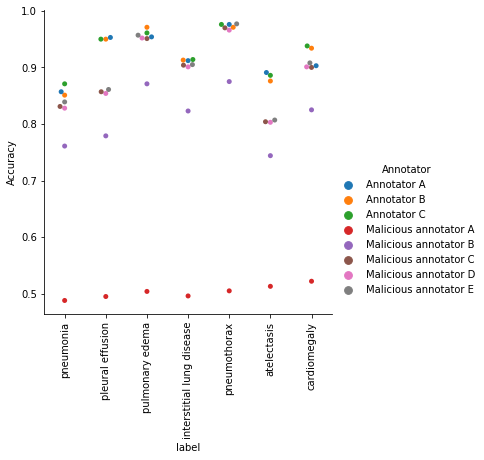

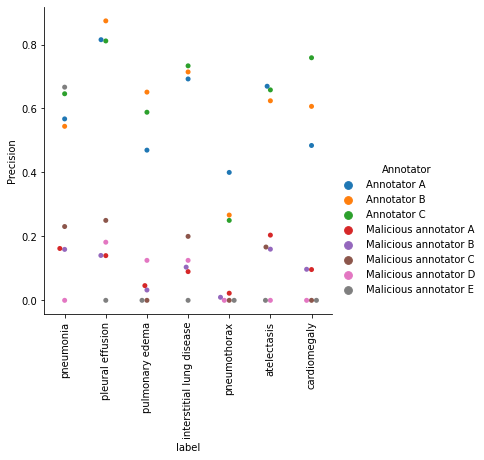

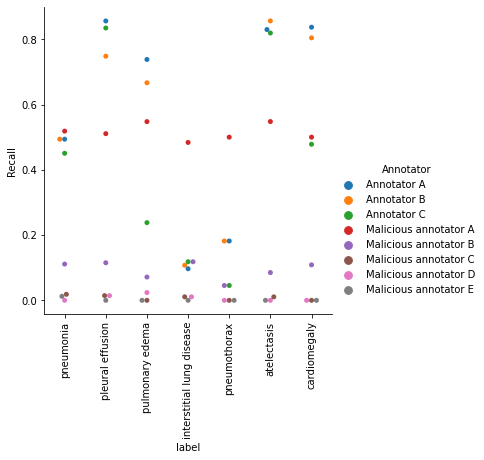

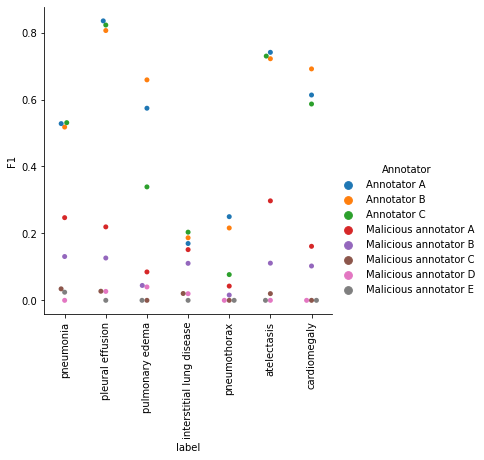

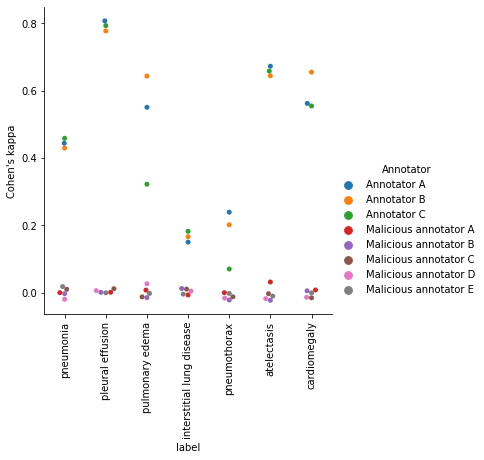

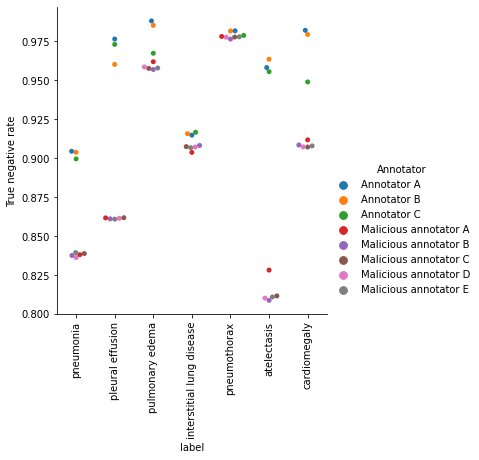

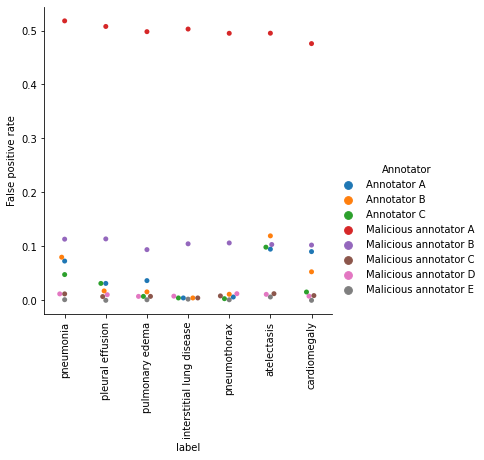

In [115]:
# Plots to search the best parameter to discriminate between expert / malicious annotators
# Cohen's kappa show most stable performance for various labels.

for item in ["Accuracy", "Precision", "Recall", "F1", "Cohen's kappa", "True negative rate", "False positive rate"]:
    ax = sns.catplot(data=df_spec, kind="swarm", x="label", y=item, hue="Annotator")
    ax.set_xticklabels(rotation=90)

In [116]:
# Load mean duration time of labels.

In [117]:
time_df = pd.read_csv("time_duration.csv")

In [118]:
time_df

,Label,Mean time,CI95
0,pneumonia,5.83,0.79
1,atelectasis,6.05,0.58
2,pleural effusion,5.43,0.55
3,cardiomegaly,4.63,0.54
4,pulmonary edema,7.27,1.28
5,interstitial lung disease,10.79,4.53
6,pneumothorax,13.92,3.93


In [119]:
# Reward calculation for each label or each annotator
# Annotator A/B/C passed the basic filtering


In [120]:
afr_filtered_df = agr_df.drop(["Malicious annotator A", "Malicious annotator B", "Malicious annotator C", "Malicious annotator D", "Malicious annotator E"], axis =1)

In [121]:
passed_annotators = ["Annotator A", "Annotator B", "Annotator C"]

In [122]:
def blockchain_share(data, df_mean_time):
    annotator_list = [a for a in list(data.columns) if re.match(r'Annotator',a) != None]
    new_df = pd.DataFrame(data={})
    labels = df_mean_time['Label'].to_list()
    
    for label in labels:
        single_label = data[ data["label"] == label]
        single_label["NT"] = single_label[ annotator_list ].sum(axis=1)
        single_label["NF"] = len(annotator_list) - single_label[ annotator_list ].sum(axis=1)
        #single_label = single_label.assign(AINT=(single_label.ai_prediction + single_label.NT).where(single_label.ai==True,single_label.NT))
        #single_label = single_label.assign(AINF=(single_label.ai_prediction + single_label.NF).where(single_label.ai==False,single_label.NF))
        #single_label['TKJ'] = [int(a[0] > a[1]) for a in list(zip(single_label["AINT"].tolist(), single_label["AINF"].tolist()))]
        single_label['AKJ'] = [a[0] > a[1] for a in list(zip(single_label["NT"].tolist(), single_label["NF"].tolist()))]

        for annotator in annotator_list:
            r_anno = "R_"+str(annotator)
            single_label.loc[ (single_label[annotator] == single_label["AKJ"]) & (single_label[annotator] == True), r_anno] = 1/single_label["NT"]
            single_label.loc[ (single_label[annotator] == single_label["AKJ"]) & (single_label[annotator] == False), r_anno] = 1/single_label["NF"]
            single_label.loc[ (single_label[annotator] != single_label["AKJ"]), r_anno] = 0

        single_label.loc[ (single_label['AKJ'] == True) ,'DKJ' ] = single_label['NT'] / (single_label['NT']+single_label['NF'])
        single_label.loc[ (single_label['AKJ'] == False) ,'DKJ' ] = single_label['NF'] / (single_label['NT']+single_label['NF'])
        label_value = single_label["AKJ"].sum() / single_label.shape[0]
        normalized_time = df_mean_time[ df_mean_time["Label"] == label ]["Mean time"].tolist()[0] / df_mean_time["Mean time"].max()

        for annotator in annotator_list:
            share_anno = "share_"+str(annotator)
            r_anno = "R_"+str(annotator)
            single_label[share_anno] = (label_value + normalized_time) * 8 * (0.5 - single_label["DKJ"]) * (0.25 - single_label[r_anno])

        new_df = pd.concat([new_df, single_label])
    return new_df

In [123]:
share_df = blockchain_share(afr_filtered_df, time_df)

/home/jongmunchoi/code/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jongmunchoi/code/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/jongmunchoi/code/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [124]:
share_df[ share_df["case"] == 1068 ]

,Annotator A,Annotator B,Annotator C,Pseudo ground truth,ai_prediction,case,label,NT,NF,AKJ,R_Annotator A,R_Annotator B,R_Annotator C,DKJ,share_Annotator A,share_Annotator B,share_Annotator C
0,False,False,True,True,0.519729,1068,pneumonia,1,2,False,0.500000,0.500000,0.000000,0.666667,0.180607,0.180607,-0.180607
1,True,True,False,False,0.318060,1068,atelectasis,2,1,True,0.500000,0.500000,0.000000,0.666667,0.223209,0.223209,-0.223209
6,False,False,False,False,0.057908,1068,pleural effusion,0,3,False,0.333333,0.333333,0.333333,1.000000,0.175362,0.175362,0.175362
4,False,False,False,False,0.193517,1068,cardiomegaly,0,3,False,0.333333,0.333333,0.333333,1.000000,0.145538,0.145538,0.145538
2,False,False,False,False,0.334213,1068,pulmonary edema,0,3,False,0.333333,0.333333,0.333333,1.000000,0.185757,0.185757,0.185757
3,False,False,False,True,0.517582,1068,interstitial lung disease,0,3,False,0.333333,0.333333,0.333333,1.000000,0.262381,0.262381,0.262381
5,False,False,False,False,0.028087,1068,pneumothorax,0,3,False,0.333333,0.333333,0.333333,1.000000,0.336333,0.336333,0.336333


In [125]:
shares = [share_df[annotator].sum() for annotator in passed_annotators]

for idx, share in enumerate(shares):
    print(f"{passed_annotators[idx]} share: {int(share*1000/sum(shares)*100)/100}T MED")

Annotator A share: 371.01T MED
Annotator B share: 346.85T MED
Annotator C share: 282.12T MED


In [126]:
labels = list(set(share_df["label"].to_list()))
share_summary = {}
share_summary["label"] = []

for annotator in passed_annotators:
    share_summary[annotator] = []
    
for label in labels:
    share_summary["label"].append(label)
    
    for annotator in passed_annotators:
        shares_per_annolabel = share_df[ share_df['label'] == label][annotator].sum().sum()
        share_summary[annotator].append(shares_per_annolabel)
        
share_summary = pd.DataFrame(data = share_summary)

In [127]:
share_summary["Total"] = share_summary[passed_annotators].sum(axis=1)

In [128]:
share_summary

,label,Annotator A,Annotator B,Annotator C,Total
0,pneumonia,141,147,113,401
1,pleural effusion,146,119,143,408
2,pulmonary edema,66,43,17,126
3,interstitial lung disease,13,14,15,42
4,pneumothorax,10,15,4,29
5,atelectasis,233,258,234,725
6,cardiomegaly,159,122,58,339
